In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig


# Projeto de filtros FIR em Python para implementar depois na FPGA

Python, no pacote *scipy.signal*, já traz algumas funções para o cálculo de coeficientes de filtros FIR e para a análise do resultado em frequência.

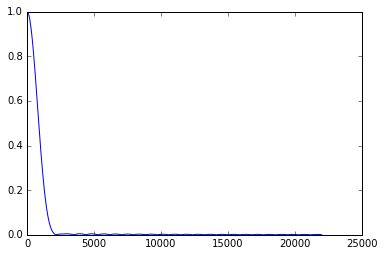

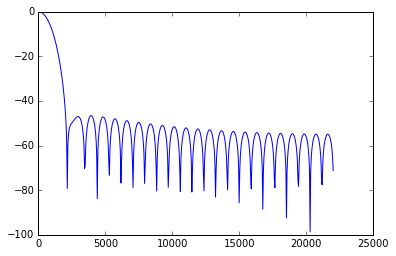

In [110]:
numtaps = 50
cutoff = 500
fs = 44100.
nyq = fs/2

b = sig.firwin(numtaps, cutoff, nyq=nyq) # b <= coeficientes do filtro FIR
w, h = sig.freqz(b) # <= w <= frequencias, h <= resposta (numeros complexos)

plt.figure()
plt.plot(w*nyq/(np.pi), np.abs(h)) # Plot em valor absoluto
plt.show()

plt.figure()
plt.plot(w*nyq/(np.pi), 20*np.log10(np.abs(h))) # Plot em dB
plt.show()

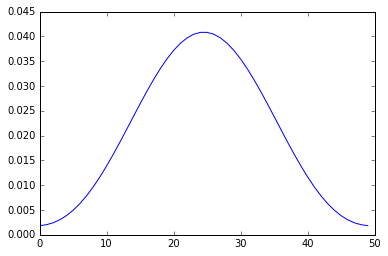

In [111]:
plt.figure()
plt.plot(b)
plt.show()

In [112]:
nBits = 5
max_val = 2**(nBits-2) # ** significa 'elevado a'

# Normalizacao dos coeficientes
bn = b / np.max(np.abs(b)) 
bn *= max_val

# Conversao para inteiro
bn = bn.astype(int)

# Imprimir na tela
for coef in bn[:-1]:
    print str(coef) + ",",

print bn[-1]

0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0


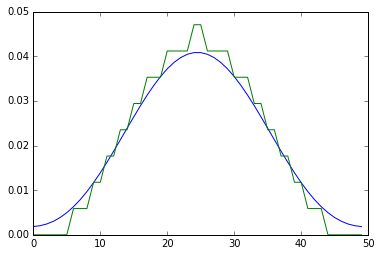

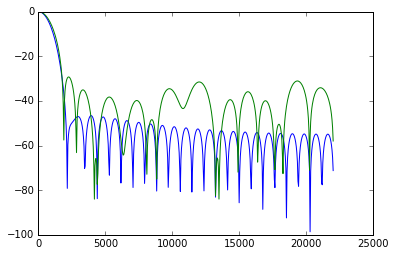

In [113]:
# Verificacao do erro por quantizacao

plt.figure()
plt.plot(b/np.sum(b))
plt.plot(bn/np.sum(bn.astype(float)))
plt.show()

wn, hn = sig.freqz(bn/np.sum(bn.astype(float))) # <= w <= frequencias, h <= resposta (numeros complexos)

plt.figure()
plt.plot(w*nyq/(np.pi), 20*np.log10(np.abs(h))) # Plot em dB
plt.plot(wn*nyq/(np.pi), 20*np.log10(np.abs(hn))) # Plot em dB
plt.show()